# Load data

In [61]:
import numpy as np
from scipy import stats
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

In [81]:
#combined_adata = ad.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/combined_adata.h5ad')
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_combined_adata.h5ad")
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/adata_old/annotated_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/adata_old/clustered_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/time_adata.h5ad")

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [82]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [83]:
#adata.uns['log1p']

In [84]:
if 'log1p' not in adata.uns.keys():
    adata.uns['log1p'] = {}
adata.uns['log1p']['base'] = np.e

# Create dictionary ensembl2symbol

In [85]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id, gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


In [86]:
ensembl_to_gene_name

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

# Test Data distributions

In [136]:
# Step 1: Generate or input your data (replace with your data)
data = np.random.lognormal(mean=0, sigma=1, size=1000)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1000,)


In [137]:
first_column = adata.X[:, 0]
data = first_column.toarray()
print(type(data))
print(data.shape)
data = data[np.isfinite(data)]

<class 'numpy.ndarray'>
(10594, 1)


In [138]:
if len(data.shape) > 1 and data.shape[1] == 1:  # if it's a column vector
    data = data.ravel()

In [139]:
print(data.shape)

(10594,)


In [19]:
unique_values = np.unique([int(x) for x in adata.obs['leiden'].values])
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [20]:
#leidens = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' 10', '13', '14', '15', '16']
leidens = unique_values

In [16]:
print(adata.obs['condition'])

barcode
AAACCCAGTAGGCTCC-1         CTRL_1
AAACCCAGTCGCAACC-1         CTRL_1
AAACCCATCCACAAGT-1         CTRL_1
AAACGCTTCACTACGA-1         CTRL_1
AAACGCTTCAGCCTCT-1         CTRL_1
                         ...     
TTTACTGTCATTACTC-1    TGFb1_GEM_2
TTTCACAGTGATATAG-1    TGFb1_GEM_2
TTTCACATCGATGCAT-1    TGFb1_GEM_2
TTTCATGTCCCTCTAG-1    TGFb1_GEM_2
TTTGACTGTTCCGGTG-1    TGFb1_GEM_2
Name: condition, Length: 10594, dtype: category
Categories (8, object): ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


In [14]:
adata.obs['condition'].cat.categories


Index(['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2',
       'TGFb1_GEM_1', 'TGFb1_GEM_2'],
      dtype='object')

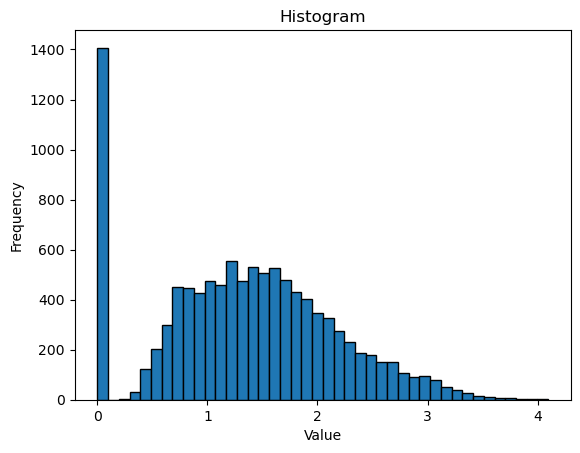

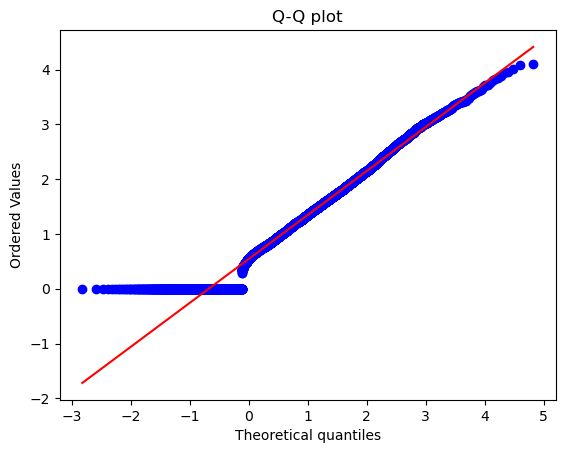

K-S statistic: 0.1811608676107626
P-value: 1.035646857406889e-304
Reject the null hypothesis, the data does not follow a lognormal distribution.


In [140]:
# Step 2: Visual Inspection using a histogram
plt.hist(data, bins='auto', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: Q-Q plot
stats.probplot(data, dist='norm', sparams=(1,), plot=plt)
plt.title('Q-Q plot')
plt.show()

# Step 4: Statistical test (Kolmogorov-Smirnov test)
# Here, we use the lognormal distribution as the comparison distribution
D, p_value = stats.kstest(data, 'norm', args=(1,))
print(f'K-S statistic: {D}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('Fail to reject the null hypothesis, the data follows a lognormal distribution.')
else:
    print('Reject the null hypothesis, the data does not follow a lognormal distribution.')

In [141]:
import powerlaw

# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Print out the alpha parameter (scaling exponent) of the power-law fit
print(fit.power_law.alpha)

# Compare the power-law fit to an exponential fit, for instance
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

print(R, p)

ModuleNotFoundError: No module named 'powerlaw'

# Differential expression analysis all


## Prepare compare all condition 

In [17]:
# Specify the groups you want to compare
categories_list = list(adata.obs['condition'].cat.categories)
print(categories_list)

#conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
conditions = categories_list


['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']


## Prepare compare all clusters

In [18]:
print(adata.obs['leiden'])


barcode
AAACCCAGTAGGCTCC-1     1
AAACCCAGTCGCAACC-1    11
AAACCCATCCACAAGT-1     5
AAACGCTTCACTACGA-1     8
AAACGCTTCAGCCTCT-1     6
                      ..
TTTACTGTCATTACTC-1    14
TTTCACAGTGATATAG-1     3
TTTCACATCGATGCAT-1     3
TTTCATGTCCCTCTAG-1     7
TTTGACTGTTCCGGTG-1     3
Name: leiden, Length: 10594, dtype: category
Categories (18, object): ['0', '1', '2', '3', ..., '14', '15', '16', '17']


## Translations

### example translations

In [11]:
#adata.var['gene_symbol'] = [ensembl_to_gene_name.get(gene_id, 'NA') for gene_id in adata.var_names]

In [96]:
#adata.var_names = [ensembl_to_gene_name.get(gene_id, gene_id) for gene_id in adata.var_names]

## Get information of your single cell object

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'index', 'IDs'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


### Get information about how the counts are store
### Log transformed?
### Sometimes the base of the logtransformation is not stored properly. this information can be added afterwards. 

In [23]:
if 'log1p' in adata.uns and 'base' not in adata.uns['log1p']:
    adata.uns['log1p']['base'] = np.e  # Assuming natural logarithm was used. Change accordingly if it was a different base.

## Comparison of all vs. all

In [7]:
comparisons = []
for i in range(len(conditions)):
    for j in range(i+1, len(conditions)):
        comparisons.append((conditions[i], conditions[j]))

NameError: name 'conditions' is not defined

In [66]:
import scanpy as sc

for group1, group2 in comparisons:
    # Subset the data for only the two groups you're comparing
    subset = adata[adata.obs['condition'].isin([group1, group2])]
    
    # Mark these two conditions in the subset
    subset.obs['group_comparison'] = subset.obs['condition'].astype(str)
    
    # Differential expression analysis
    sc.tl.rank_genes_groups(subset, 'group_comparison', method='wilcoxon')
    
    # You can then retrieve and store/save the results for this comparison
    # For instance:
    result = subset.uns['rank_genes_groups']
    # Store or further process the result

## Comparison contions vs. all other conditions

In [67]:
import scanpy as sc
import pandas as pd

# Initialize an empty dataframe to store results
results_df = pd.DataFrame()

# Example conditions
# conditions = ['CTRL_1', 'CTRL_2', 'CTRL_2D', 'GEM_2', 'TGFb1_1', 'TGFb1_2', 'TGFb1_GEM_1', 'TGFb1_GEM_2']
# Example dictionary mapping Ensembl IDs to gene names
# ensembl_to_gene_name = {...}  

for condition in conditions:
    # Create a new column for grouping: the condition vs. all others
    adata.obs['grouping'] = ['target' if x == condition else 'others' for x in adata.obs['condition']]
    
    # Perform differential expression
    sc.tl.rank_genes_groups(adata, 'grouping', method='wilcoxon', n_genes=adata.shape[1])
    
    # Convert result to dataframe
    result = pd.DataFrame({
        'ID': adata.uns['rank_genes_groups']['names']['target'],
        'log2FC': adata.uns['rank_genes_groups']['logfoldchanges']['target'],
        'p.value': adata.uns['rank_genes_groups']['pvals']['target'],
        'adjusted.p.value': adata.uns['rank_genes_groups']['pvals_adj']['target']
    })

    # Calculate basemean expression for genes present in adata.var_names
    result['basemean'] = [
        (adata[:, gene].X.sum() / adata.shape[0]) if gene in adata.var_names else 'NA' 
        for gene in result['ID']
    ]

    # Convert ensembl IDs to gene symbols
    result['symbol'] = result['ID'].map(ensembl_to_gene_name).fillna(result['ID'])

    # Assign comparison name
    result['comparison'] = condition + "_vs_others"

    # Append result to the main dataframe
    results_df = pd.concat([results_df, result])

NameError: name 'conditions' is not defined

In [64]:
results_df.head(20)

NameError: name 'results_df' is not defined

In [104]:
# Reorder columns
results_df = results_df[['comparison', 'ID', 'symbol', 'basemean', 'log2FC', 'p.value', 'adjusted.p.value']]


In [119]:
# write to file location
results_df.to_csv("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/diff_anaylsis_conditions_results_df.csv", index=False)

## Visualize the results

In [106]:
import pandas as pd
results_df = pd.read_csv("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/diff_anaylsis_conditions_results_df.csv")

In [107]:
adata

AnnData object with n_obs × n_vars = 10594 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'grouping'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'gene_symbol', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [108]:
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


## Visualize Top Genes for the comparions conditions vs all other

['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']
['PMEPA1', 'SERPINE1', 'KRT18', 'MRC2', 'PLOD2', 'COL1A1', 'TPM1', 'TGFBI', 'SPOCK1', 'PDGFB', 'LINC03057', 'MBOAT2', 'MMP2', 'JAG1', 'LOX', 'PDGFA', 'MARCKS', 'FNDC3B', 'DKK1', 'AP1S3', 'PLEK2', 'MYO10', 'KRT8', 'SKIL', 'NAV1', 'FTL', 'PPP1R14A', 'ITGAV', 'PGM2L1', 'IGFBP3', 'NKAIN4', 'ANGPTL4', 'TUBA4A', 'ITGA5', 'ADAM19', 'CDKN1A', 'ULK1', 'AKT3', 'KRT19', 'RYBP', 'RUNX1', 'LPCAT2', 'TUBA1A', 'BMPR2', 'AMIGO2', 'KLF7', 'COL5A1', 'FOXP1', 'HYCC1', 'E2F7', 'ADAMTS6', 'NDRG1', 'IER3', 'CRLF1', 'GRB10', 'CIB1', 'S100A11', 'PTHLH', 'AGR2', 'C15orf48', 'CD82', 'COL22A1', 'IGFBP7', 'LTBP3', 'PODXL', 'SOX4', 'TIMP2', 'BTG1', 'ADIRF', 'LMCD1', 'ANXA1', 'S100A2', 'GPRC5A', 'ELL2', 'ARHGAP22', 'VEGFA', 'JUNB', 'IVNS1ABP', 'PRSS3', 'BHLHE40', 'MFAP2', 'HMGA2', 'MELTF', 'SMURF2', 'SMOX', 'BPGM', 'CCN2', 'SLC2A1', 'FAM89B', 'F

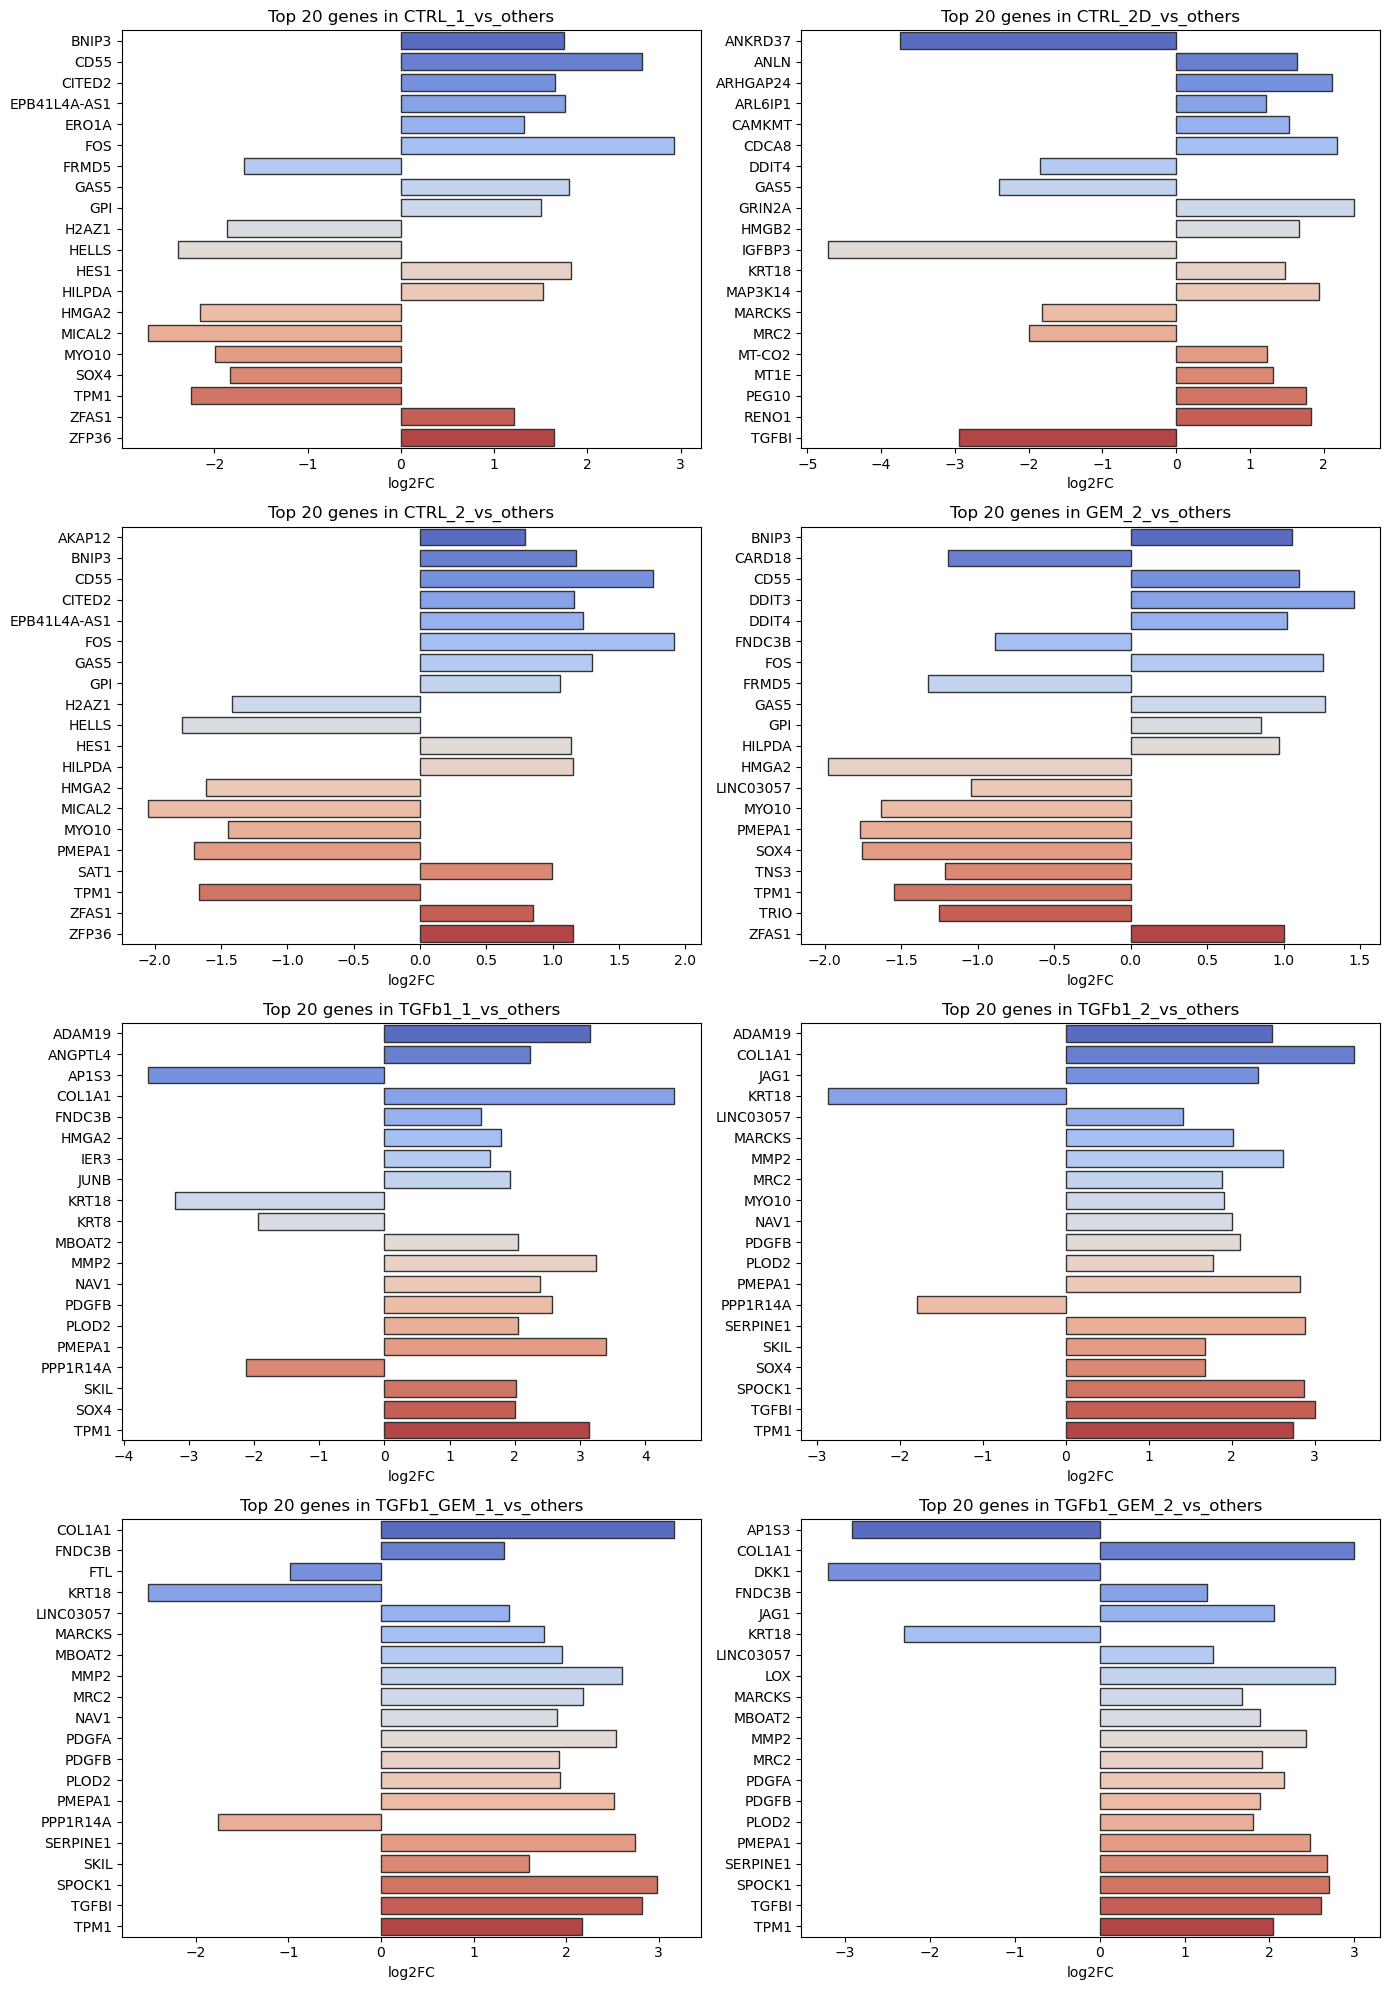

In [135]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Visualize the top genes
    # Sort by adjusted p-value and pick tops n genes
    n_top_genes = 20  # for instance
    #top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    #print(top_genes)
    # Get top 20 genes by adjusted.p.value
    top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    
    # Now, sort those top 20 genes by symbol
    top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

    
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Top {n_top_genes} genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity

plt.tight_layout()
plt.show()

['CTRL_1_vs_others', 'CTRL_2D_vs_others', 'CTRL_2_vs_others', 'GEM_2_vs_others', 'TGFb1_1_vs_others', 'TGFb1_2_vs_others', 'TGFb1_GEM_1_vs_others', 'TGFb1_GEM_2_vs_others']


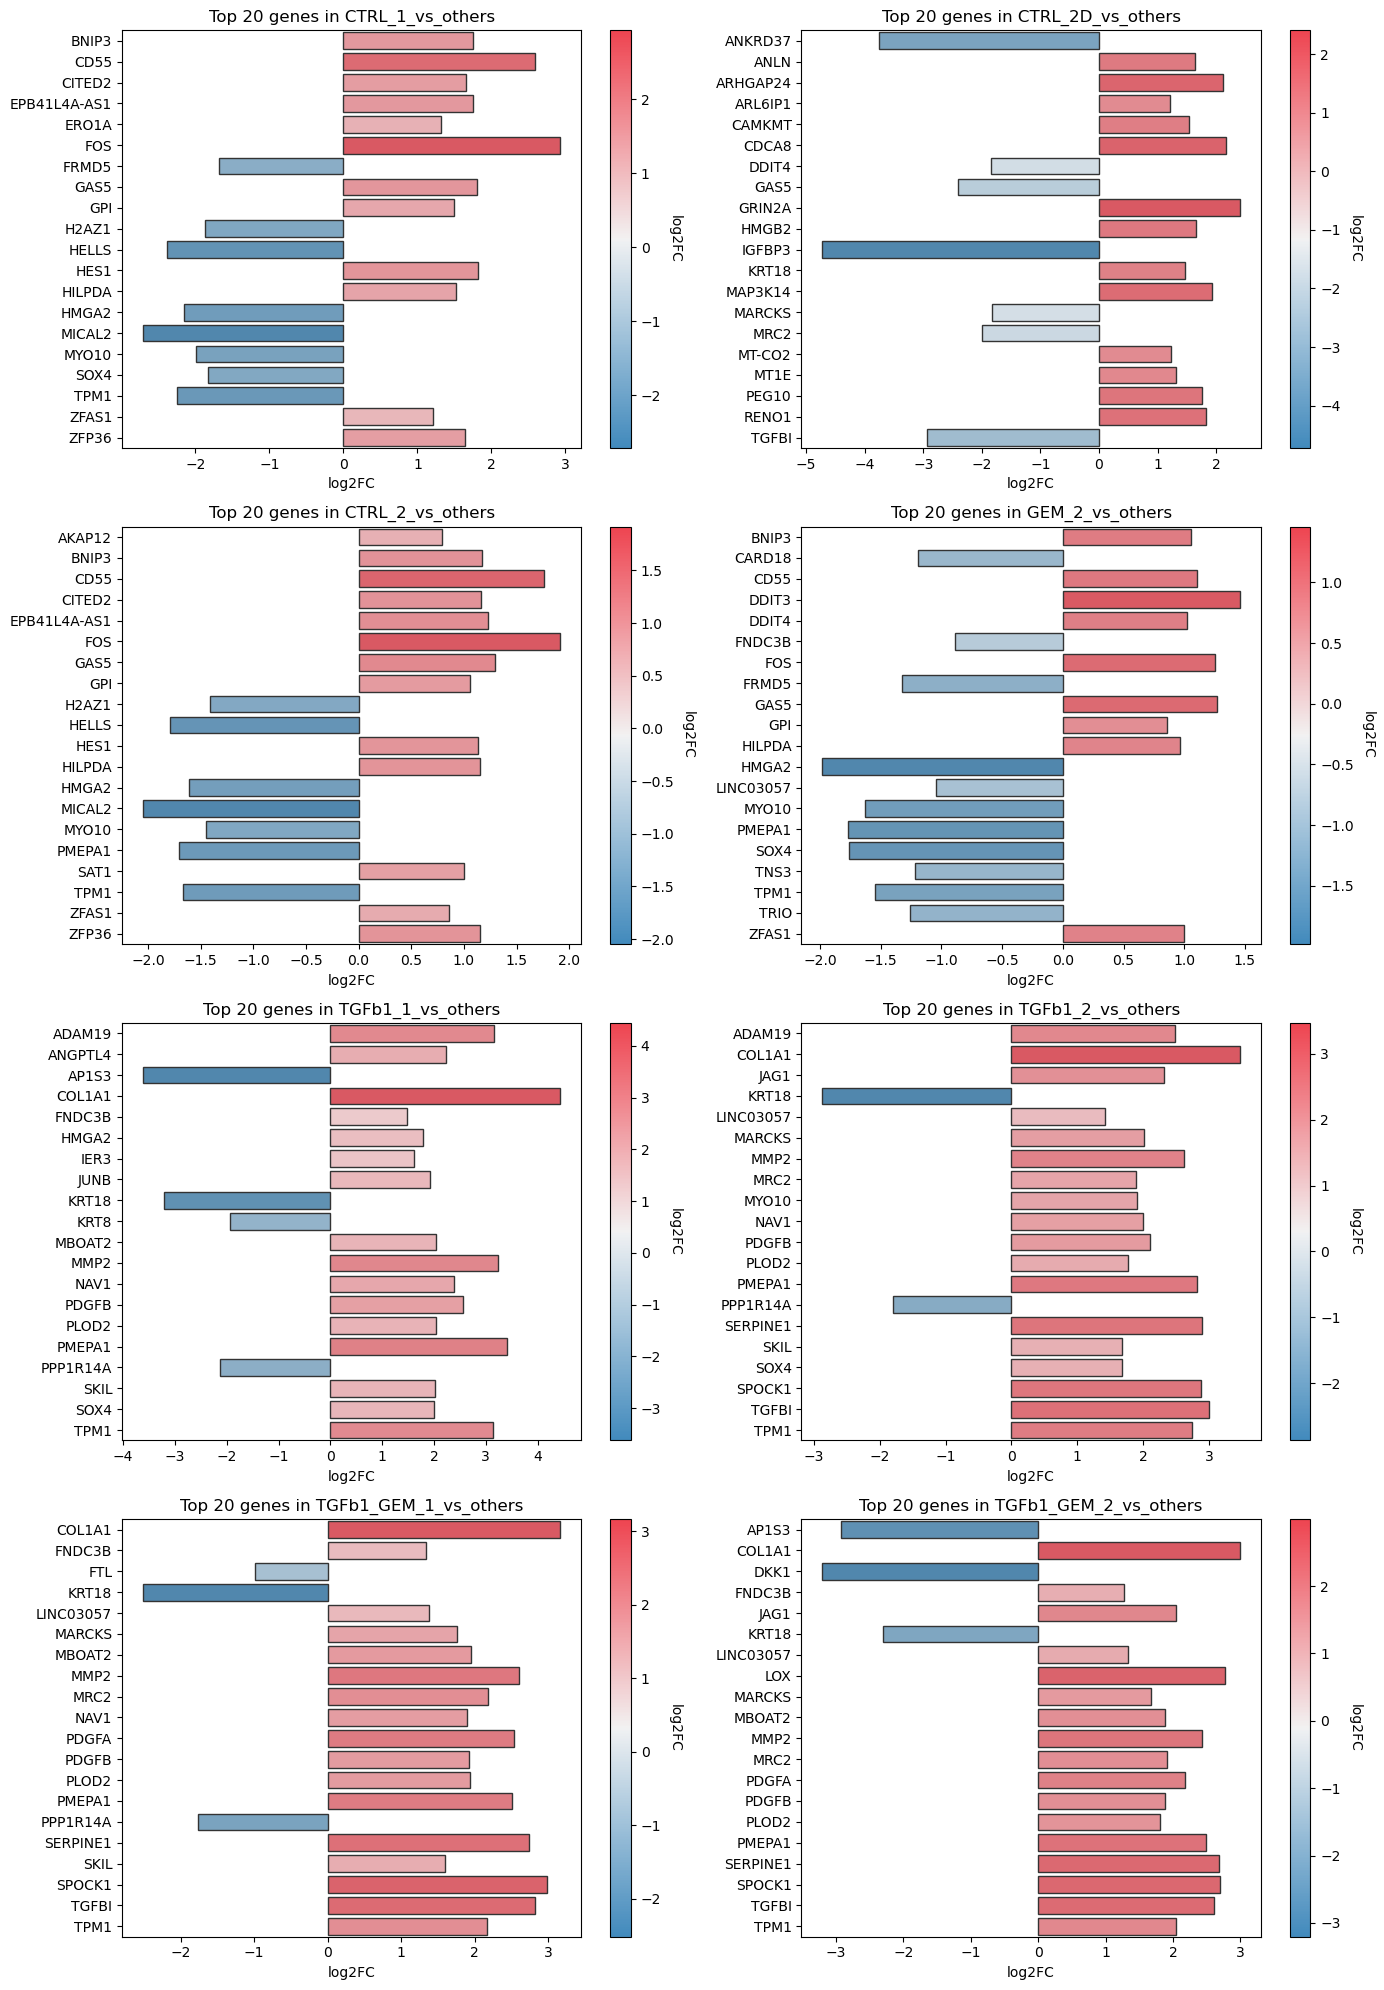

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())
print(sorted_unique_comparisons)

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Get top 20 genes by adjusted.p.value
    n_top_genes = 20  # for instance
    top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
    
    # Now, sort those top 20 genes by symbol
    top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

    # Generate a color mapping for log2FC
    cmap = sns.diverging_palette(240, 10, s=80, l=55, as_cmap=True)  # Blue to white to red
    norm_log2FC = plt.Normalize(top_genes["log2FC"].min(), top_genes["log2FC"].max())
    log2FC_colors = cmap(norm_log2FC(top_genes["log2FC"].values))
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes, x="log2FC", y="symbol", palette=log2FC_colors, edgecolor=".2", ax=ax)
    ax.set_title(f"Top {n_top_genes} genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_log2FC)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("log2FC", rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


In [144]:
import os
# Save the figure
fig.savefig('figures/comparisons_plot.png', bbox_inches='tight')

## Visualize shared Top Gene between conditions (not working)

In [117]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataframe as results_df
sorted_unique_comparisons = sorted(results_df['comparison'].unique())

# Extract top 30 genes from each condition
top_genes_per_comparison = {}
for comparison in sorted_unique_comparisons:
    filtered_results = results_df[results_df['comparison'] == comparison]
    top_genes = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(160)['symbol'].tolist()
    top_genes_per_comparison[comparison] = set(top_genes)

# Intersect top genes across all conditions
intersected_genes = set.intersection(*top_genes_per_comparison.values())
intersected_genes_sorted = sorted(list(intersected_genes))

# Initialize the 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots

for index, comparison in enumerate(sorted_unique_comparisons):

    # Extract results for a specific comparison
    specific_comparison = comparison  # example
    filtered_results = results_df[results_df['comparison'] == specific_comparison]
    
    # Filter the results to only show the intersected and sorted genes
    top_genes_data = filtered_results[filtered_results['symbol'].isin(intersected_genes_sorted)]
    
    # Sort the results according to the order in intersected_genes_sorted
    top_genes_data = top_genes_data.set_index('symbol').loc[intersected_genes_sorted].reset_index()
    
    # Generate a bar plot in the appropriate subplot
    ax = axes[index // 2, index % 2]  # Determine the row and column for subplot
    sns.barplot(data=top_genes_data, x="log2FC", y="symbol", palette="coolwarm", edgecolor=".2", ax=ax)
    ax.set_title(f"Genes in {comparison}")
    ax.set_xlabel('log2FC')  # Set x-axis label
    ax.set_ylabel('')  # Clear y-axis label for brevity

plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

In [118]:
top_genes_data

NameError: name 'top_genes_data' is not defined

## Volcanos

In [113]:
#!pip install adjustText

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


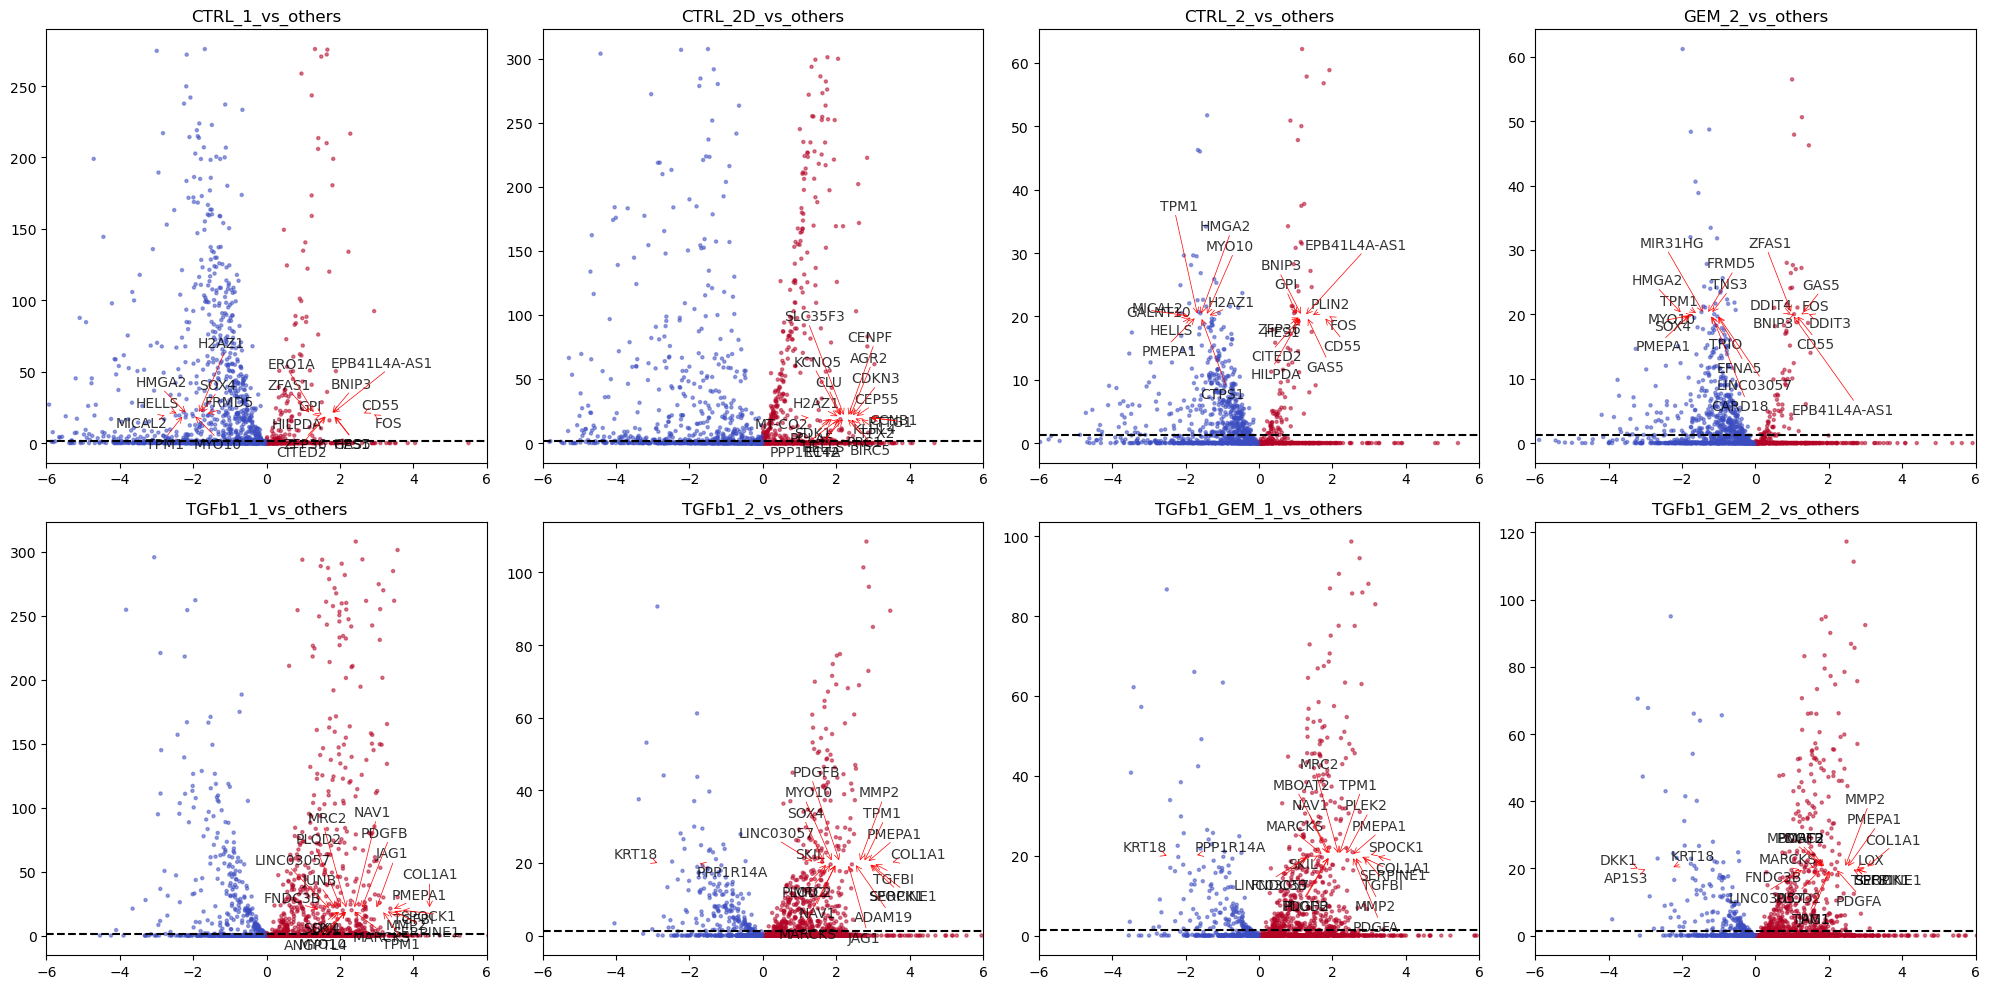

In [137]:
#... [previous part of the code]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Scatter points
    ax.scatter(filtered_results['log2FC'], -np.log10(filtered_results['adjusted.p.value']),
               c=np.sign(filtered_results['log2FC']), cmap="coolwarm", alpha=0.5, s=5)
    
    # Horizontal line for p-value significance threshold, e.g., 0.05
    ax.axhline(y=-np.log10(0.05), color='black', linestyle='--')
    
    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    
    # Annotate significant genes based on fold change and adjusted p-value
    significant_genes = filtered_results[
        (filtered_results['log2FC'].abs() > 1) &  # You can adjust this threshold as per your requirement
        (filtered_results['adjusted.p.value'] < 0.05)
    ].nsmallest(20, 'adjusted.p.value')
    
    texts = []
    epsilon = 1e-20  # a small constant
    for _, row in significant_genes.iterrows():
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()


In [138]:
plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [146]:
    significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)
print(significant_genes)

                  comparison               ID     symbol  basemean    log2FC  \
14000  TGFb1_GEM_2_vs_others  ENSG00000124225     PMEPA1  1.361542  2.483969   
14001  TGFb1_GEM_2_vs_others  ENSG00000106366   SERPINE1  2.611266  2.678603   
15999  TGFb1_GEM_2_vs_others  ENSG00000111057      KRT18  1.790049 -2.303637   
14002  TGFb1_GEM_2_vs_others  ENSG00000011028       MRC2  0.896310  1.917421   
14003  TGFb1_GEM_2_vs_others  ENSG00000152952      PLOD2  1.244271  1.805905   
14004  TGFb1_GEM_2_vs_others  ENSG00000108821     COL1A1  0.763426  2.994153   
14005  TGFb1_GEM_2_vs_others  ENSG00000140416       TPM1  1.875284  2.042585   
14006  TGFb1_GEM_2_vs_others  ENSG00000120708      TGFBI  1.125810  2.607526   
14007  TGFb1_GEM_2_vs_others  ENSG00000152377     SPOCK1  0.500822  2.702738   
14008  TGFb1_GEM_2_vs_others  ENSG00000100311      PDGFB  1.399696  1.887331   
14009  TGFb1_GEM_2_vs_others  ENSG00000272763  LINC03057  1.364807  1.336577   
14010  TGFb1_GEM_2_vs_others  ENSG000001

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


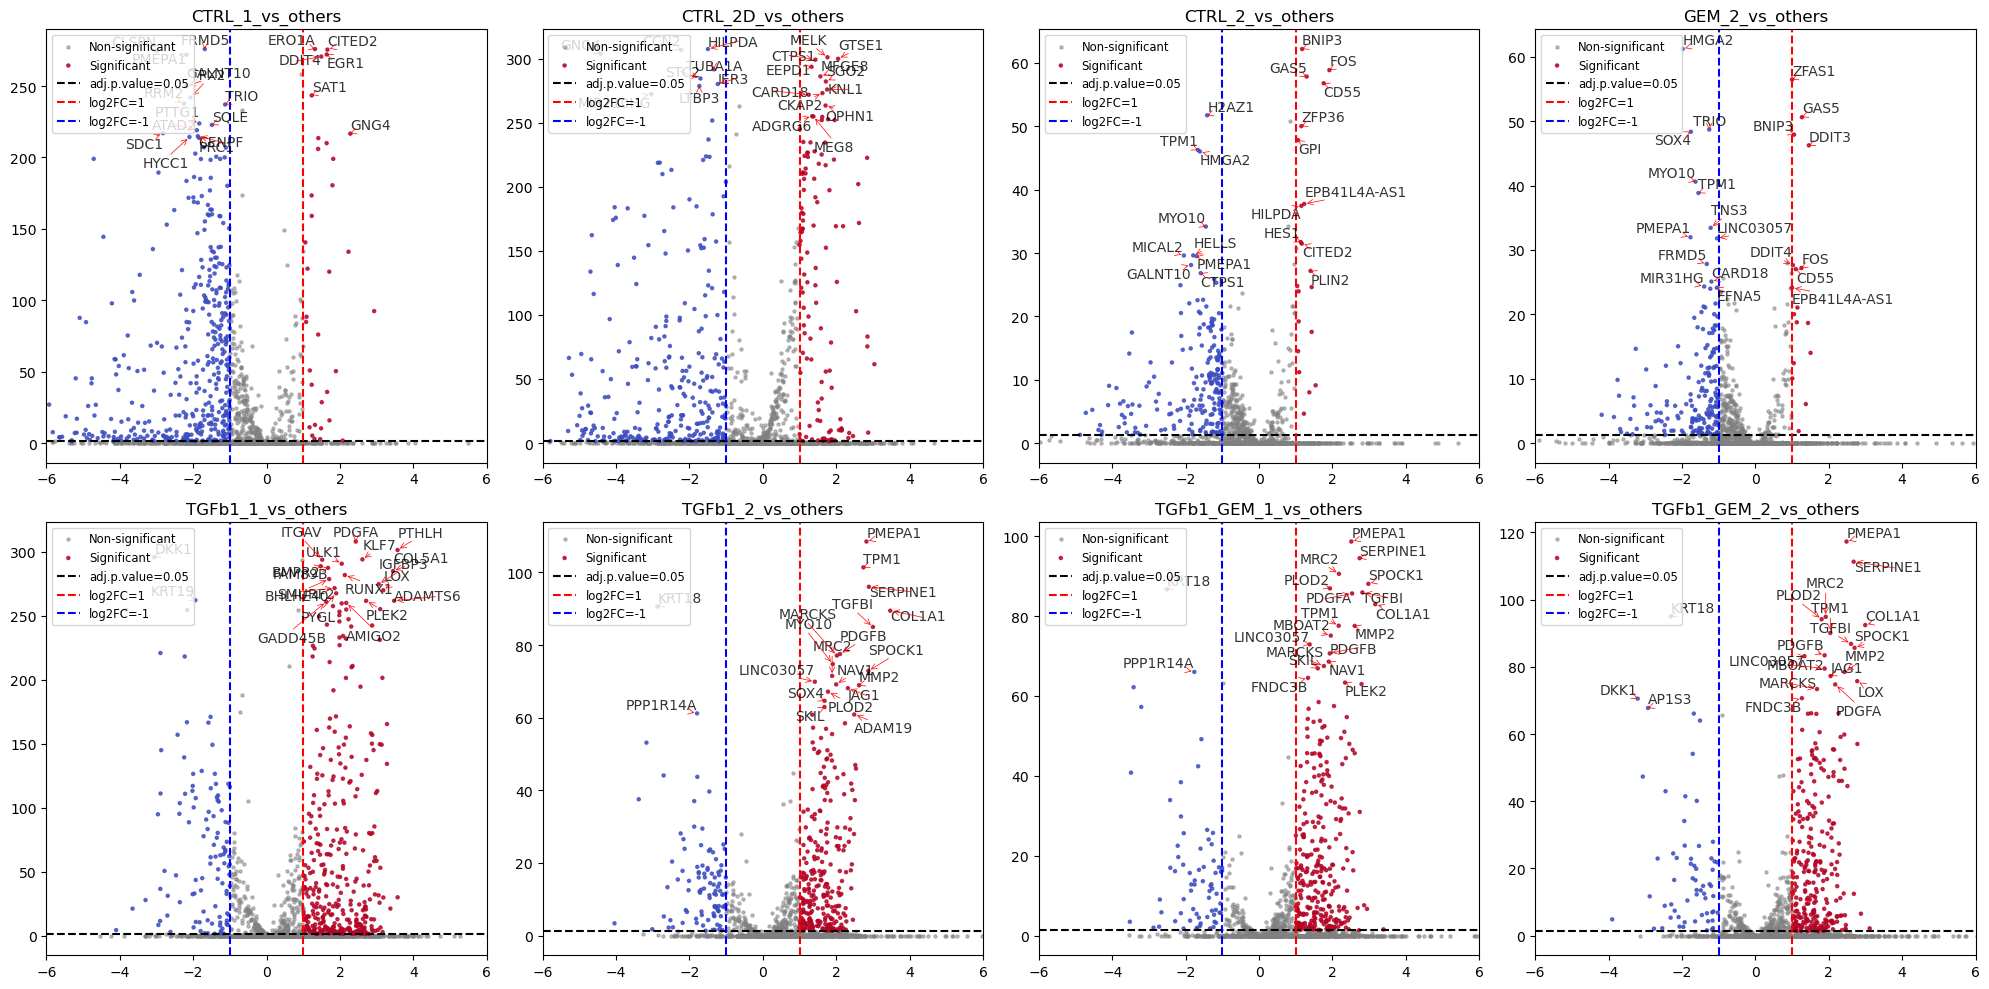

In [147]:
#... [previous part of the code]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

log2fc_threshold = 1
adj_pval_threshold = 0.05

for idx, comparison in enumerate(sorted_unique_comparisons):
    ax = axs[idx // 4, idx % 4]

    filtered_results = results_df[results_df['comparison'] == comparison]

    # Define a mask for significant genes
    significant_mask = (filtered_results['log2FC'].abs() > log2fc_threshold) & (filtered_results['log2FC'] != 0) & (filtered_results['adjusted.p.value'] < adj_pval_threshold) & (filtered_results['adjusted.p.value'] != 0)

    # Scatter points: Non-significant
    ax.scatter(filtered_results.loc[~significant_mask, 'log2FC'], -np.log10(filtered_results.loc[~significant_mask, 'adjusted.p.value']),
               color='grey', alpha=0.5, s=5, label='Non-significant')
    
    # Scatter points: Significant
    ax.scatter(filtered_results.loc[significant_mask, 'log2FC'], -np.log10(filtered_results.loc[significant_mask, 'adjusted.p.value']),
               c=np.sign(filtered_results.loc[significant_mask, 'log2FC']), cmap="coolwarm", alpha=0.8, s=5, label='Significant')

    # Horizontal line for adjusted p-value significance threshold
    ax.axhline(y=-np.log10(adj_pval_threshold), color='black', linestyle='--', label=f'adj.p.value={adj_pval_threshold}')

    # Vertical lines for log2FC significance threshold
    ax.axvline(x=log2fc_threshold, color='red', linestyle='--', label=f'log2FC={log2fc_threshold}')
    ax.axvline(x=-log2fc_threshold, color='blue', linestyle='--', label=f'log2FC=-{log2fc_threshold}')

    ax.set_title(comparison)
    ax.set_xlim(-6, 6)
    ax.legend(loc='upper left', fontsize='small')

    # Annotate significant genes
    #significant_genes = filtered_results[significant_mask]
    #significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True)
    significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)

    
    #.nsmallest(20, 'adjusted.p.value')
    #print(significant_genes)

    texts = []
    epsilon = 0 * 1e-20  # a small constant
    for _, row in significant_genes.iterrows():
        adj_pval = row['adjusted.p.value'] + epsilon
        y_val = -np.log10(adj_pval)
        if np.isfinite(y_val):
            texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))
    
    adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.tight_layout()
plt.savefig("figures/volcano_plots.png")
plt.show()

<Figure size 640x480 with 0 Axes>

# Differential Analysis Specific

## Analysis

In [130]:
group1 = '1resistant_all'
group2 = '2non-reistant_all'
comparison = group1 + "_vs_" + group2
#group1_cluster = ["3","15","6","9","4"]
group1_cluster = ["1","5","11","8","10","13","12","0","9","4"]
#group1_cluster = ["6","17"]
#group1_cluster = ["3","15"]
group2_cluster = ["2","7","14","17","3","15","6"]
#group2_cluster = ["1","5","11","8"]
#group2_cluster = ["2","7","14"]

In [131]:
# Define a function to label clusters:
# e.g. 5/11 to 2/16 
def label_clusters(cluster):
    if cluster in group1_cluster:
        return group1
    elif cluster in group2_cluster:
        return group2
    else:
        return "NA"  # This label will be used to filter out other clusters

# Create a new categorical column for comparison
adata.obs['compare_clusters'] = adata.obs['leiden'].map(label_clusters)

# Subset the data for only the two groups you're comparing
bdata = adata[adata.obs.compare_clusters.isin([group1, group2])].copy()

# sort indices to define the direction of comparison (could for interpretation of the results :)
sorted_indices = bdata.obs.sort_values(by='compare_clusters').index
bdata = bdata[sorted_indices]

# create a dataframe from bdata and translae ensembl ID to symbol (if not done before!!)
expression_df = bdata.to_df().T

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [132]:
unique_categories = bdata.obs['compare_clusters'].unique()
print(unique_categories)

['1resistant_all' '2non-reistant_all']


In [133]:
#sc.pp.log1p(bdata, base=10)

In [134]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(bdata, groupby='compare_clusters', groups=[group1, group2])

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [135]:
# Get differentially expressed genes for the comparison
de_genes = bdata.uns['rank_genes_groups']['names'][group2]

In [136]:
# Print the DEGs
print(de_genes[0:10])

['SERPINE1' 'PMEPA1' 'TGFBI' 'COL1A1' 'TPM1' 'MARCKS' 'PLOD2' 'PDGFB'
 'SPOCK1' 'JAG1']


In [137]:
!pwd

/home2/lumpi/Projects/single-cell_samantha/code/scripts


In [138]:
bdata.uns['rank_genes_groups']['names']

rec.array([('KRT18', 'SERPINE1'), ('PPP1R14A', 'PMEPA1'),
           ('AGR2', 'TGFBI'), ..., ('TGFBI', 'AGR2'),
           ('PMEPA1', 'PPP1R14A'), ('SERPINE1', 'KRT18')],
          dtype=[('1resistant_all', 'O'), ('2non-reistant_all', 'O')])

In [139]:
#ensembl_to_gene_name

In [140]:
# Convert result to dataframe
result = pd.DataFrame({
    'symbol': bdata.uns['rank_genes_groups']['names'][group1],
    'log2FC': bdata.uns['rank_genes_groups']['logfoldchanges'][group1],
    'p.value': bdata.uns['rank_genes_groups']['pvals'][group1],
    'adjusted.p.value': bdata.uns['rank_genes_groups']['pvals_adj'][group1]
})

In [156]:
# Calculate basemean expression for genes present in adata.var_names
result['basemean'] = [
    (bdata[:, gene].X.sum() / bdata.shape[0]) if gene in adata.var_names else 'NA' 
    for gene in result['symbol']
]


# Convert ensembl IDs to gene symbols
#result['symbol'] = result['ID'].map(ensembl_to_gene_name).fillna(result['ID'])
# Reverse the dictionary to map gene symbols to Ensembl IDs
gene_name_to_ensembl = {v: k for k, v in ensembl_to_gene_name.items() if v}
result['ensembl_id'] = result['symbol'].map(gene_name_to_ensembl).fillna(result['symbol'])


# Assign comparison name
result['comparison'] = group1 + "_vs_" + group2

# Sort by absolute log2FC
result = result.reindex(result['adjusted.p.value'].abs().sort_values(ascending=True).index)

In [157]:
result.head(50)

,symbol,log2FC,p.value,adjusted.p.value,basemean,ensembl_id,comparison
1926,IGFBP7,-1.965096,0.0,0.0,0.773129,ENSG00000163453,1resistant_all_vs_2non-reistant_all
1996,COL1A1,-6.159427,0.0,0.0,0.759152,ENSG00000108821,1resistant_all_vs_2non-reistant_all
1960,ADAMTS6,-6.117565,0.0,0.0,0.338703,ENSG00000049192,1resistant_all_vs_2non-reistant_all
1946,FNDC3B,-1.365130,0.0,0.0,1.539176,ENSG00000075420,1resistant_all_vs_2non-reistant_all
1975,MBOAT2,-2.325034,0.0,0.0,0.655364,ENSG00000143797,1resistant_all_vs_2non-reistant_all
1973,PTHLH,-5.941661,0.0,0.0,0.340803,ENSG00000087494,1resistant_all_vs_2non-reistant_all
13,SDK1,1.554402,0.0,0.0,1.392936,ENSG00000146555,1resistant_all_vs_2non-reistant_all
1967,PGM2L1,-2.662466,0.0,0.0,0.449090,ENSG00000165434,1resistant_all_vs_2non-reistant_all
1991,SPOCK1,-5.746475,0.0,0.0,0.485182,ENSG00000152377,1resistant_all_vs_2non-reistant_all
2,AGR2,3.204368,0.0,0.0,0.651302,ENSG00000106541,1resistant_all_vs_2non-reistant_all


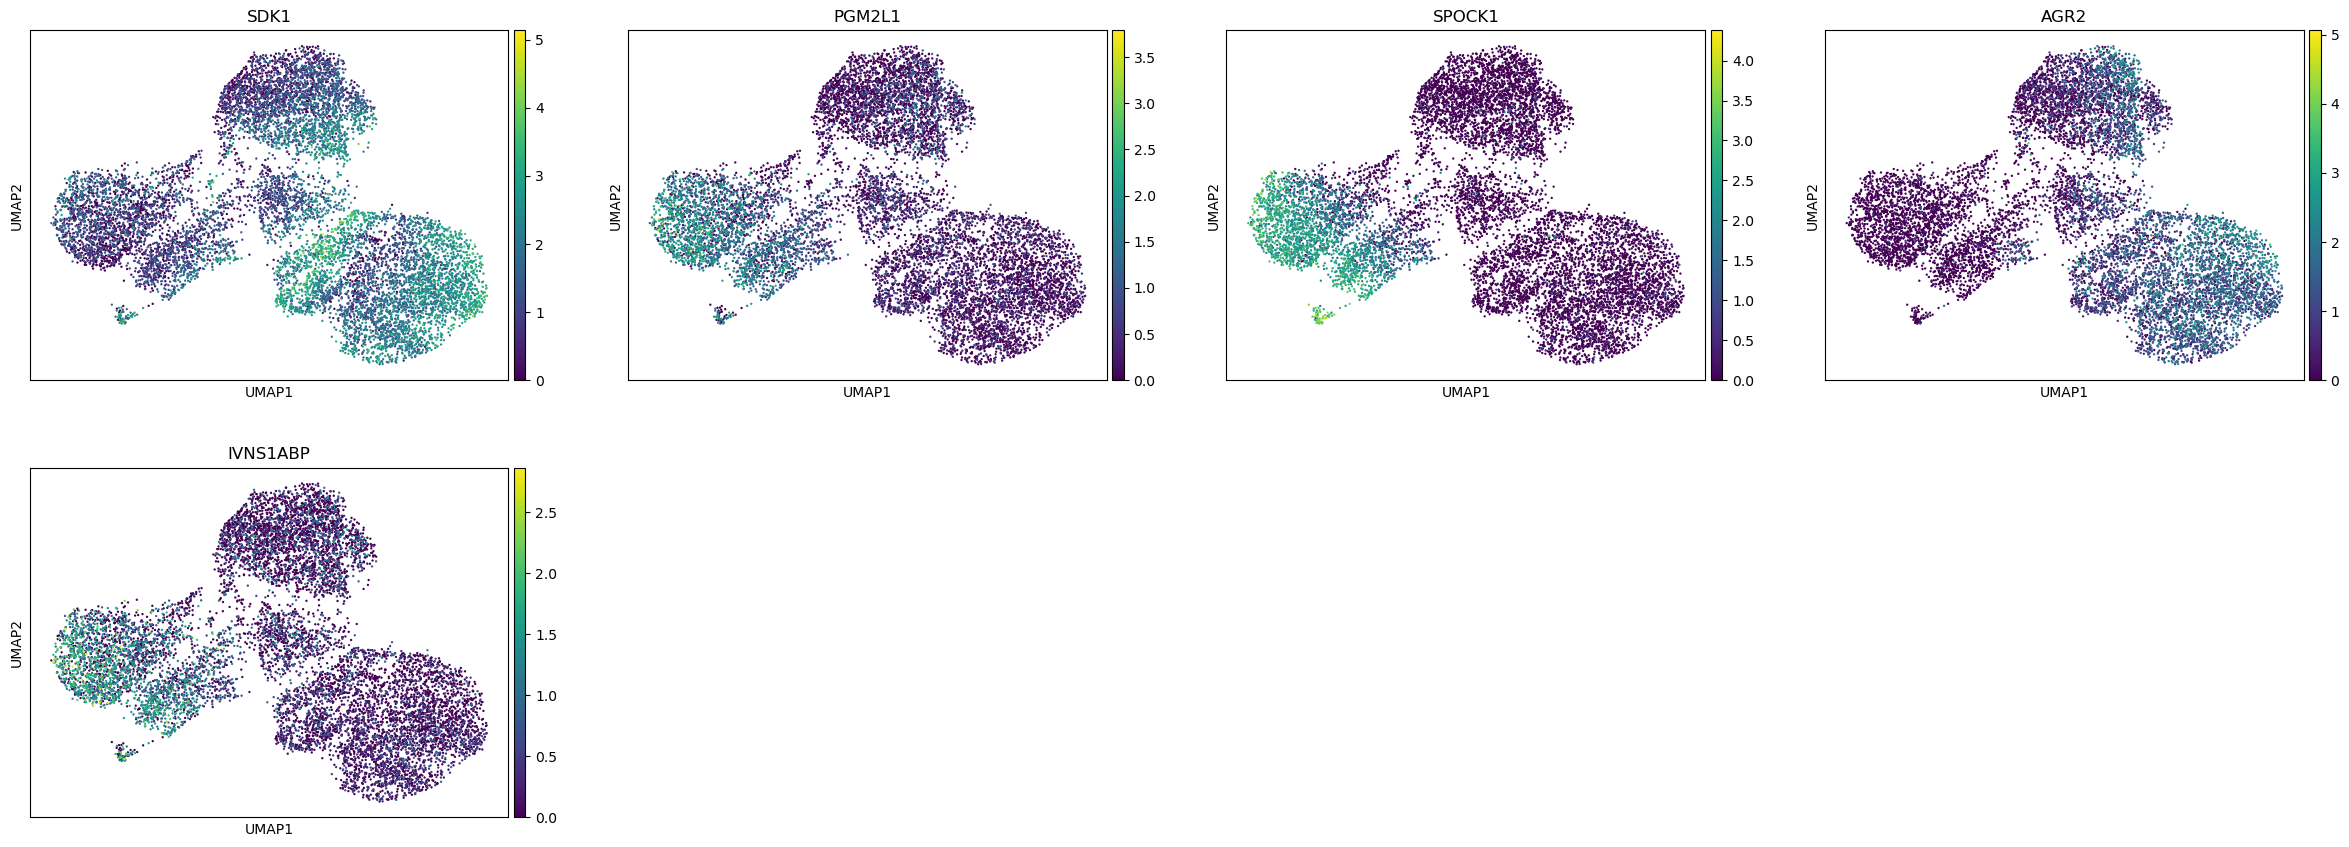

In [160]:
sc.pl.umap(adata, color=["SDK1", 'PGM2L1','SPOCK1','AGR2',"IVNS1ABP"])

In [79]:
#Specify the path for the output text file
output_file = '../../data/deg_' + comparison + '.txt'

result.to_csv(output_file, sep='\t', index=False)

print(f"Differentially expressed genes saved to {output_file}")

Differentially expressed genes saved to ../../data/deg_1resistant_all_vs_2non-reistant_all.txt


## Barplot

/tmp/ipykernel_102587/4099969013.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_by_pvalue['log2FC'] = top_by_pvalue['log2FC'].astype(float)
/tmp/ipykernel_102587/4099969013.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_by_pvalue['basemean'] = top_by_pvalue['basemean'].astype(float)


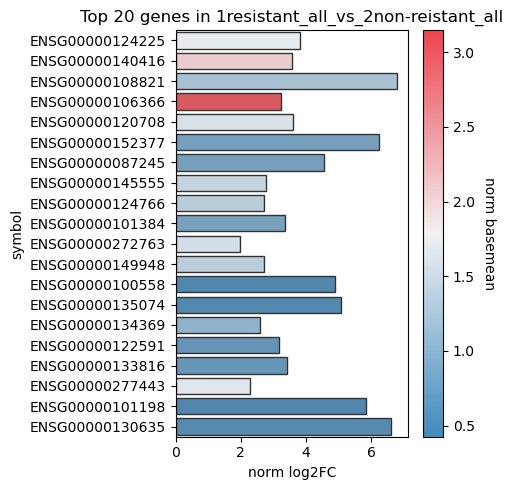

In [80]:
filtered_results = result
comparison = group1 + "_vs_" + group2


# Initialize the 4x2 subplot grid
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
fig.subplots_adjust(hspace=0.5)  # Adjust space between plots


# Get top 20 genes by adjusted.p.value
n_top_genes = 20  # for instance
#top_by_pvalue = filtered_results.sort_values(by="adjusted.p.value", ascending=True).head(n_top_genes)
top_by_pvalue = filtered_results.head(n_top_genes)

# Now, sort those top 20 genes by symbol
top_genes = top_by_pvalue.sort_values(by="symbol", ascending=True)

# Make sure 'log2FC' and 'basemean' are numeric (float)
top_by_pvalue['log2FC'] = top_by_pvalue['log2FC'].astype(float)
top_by_pvalue['basemean'] = top_by_pvalue['basemean'].astype(float)


norm_log2FC = plt.Normalize(top_by_pvalue["log2FC"].min(), top_by_pvalue["log2FC"].max())
norm_basemean = plt.Normalize(top_by_pvalue["basemean"].min(), top_by_pvalue["basemean"].max())

# Generate a color mapping for log2FC
cmap = sns.diverging_palette(240, 10, s=80, l=55, as_cmap=True)  # Blue to white to red

# Use norm_* functions directly on Series.values, ensuring they're in a compatible format
log2FC_colors = cmap(norm_log2FC(top_by_pvalue["log2FC"].values))
basemean_colors = cmap(norm_basemean(top_by_pvalue["basemean"].values))


# Generate a bar plot in the appropriate subplot
#ax = axes[index // 2, index % 2]  # Determine the row and column for subplot

sns.barplot(data=top_by_pvalue, x="log2FC", y="symbol", palette=basemean_colors, edgecolor=".2", ax=ax)
ax.set_title(f"Top {n_top_genes} genes in {comparison}")
ax.set_xlabel('norm log2FC')  # Set x-axis label
ax.set_ylabel('symbol')  # Clear y-axis label for brevity

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_basemean)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("norm basemean", rotation=270, labelpad=15)


plt.tight_layout()
plt.savefig("../../figures/barplot_" + comparison + ".png")
plt.show()


## Volcano

/storage/users/job37yv/shared_conda_envs/scanpy-env3_shared/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


     symbol    log2FC        p.value  adjusted.p.value  basemean  \
7      RRM2  4.895709  3.557273e-321     7.905050e-319  0.610125   
11    BIRC5  4.481694  2.619877e-311     5.239754e-309  0.535934   
9      CDK1  5.513428  4.487882e-303     8.159786e-301  0.487914   
10   NUSAP1  5.069666  1.442261e-297     2.403769e-295  0.481876   
12    CEP55  4.089589  5.192730e-254     7.988815e-252  0.422672   
14    UBE2C  3.131158  2.725086e-248     3.892981e-246  0.771290   
13     ANLN  3.685834  1.477241e-238     1.969655e-236  0.493705   
15    ATAD2  3.261844  1.004159e-229     1.255199e-227  0.573280   
16    PTTG1  3.390549  1.460561e-223     1.718307e-221  0.627401   
18    CLSPN  3.781048  1.137673e-215     1.264081e-213  0.450839   
17   DIAPH3  4.446784  6.328112e-210     6.661171e-208  0.357959   
19     MELK  3.909844  5.903571e-207     5.903571e-205  0.375638   
21     CKS2  2.225215  3.018126e-202     2.874405e-200  0.776174   
20   KIF20B  3.122386  1.761070e-191     1.60097

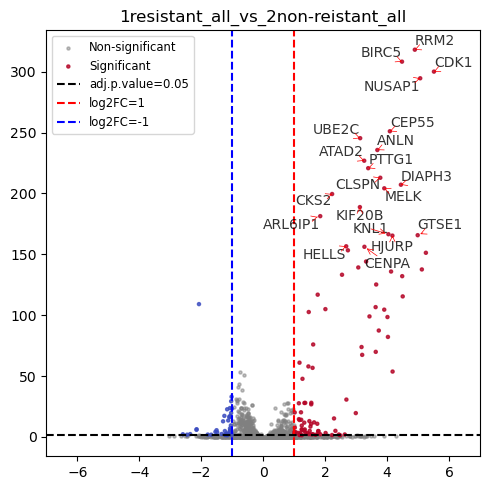

In [85]:
## Take care: zero pvalue cannot be displayed

filtered_results = result
comparison = group1 + "_vs_" + group2

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

log2fc_threshold = 1
adj_pval_threshold = 0.05

# Define a mask for significant genes
significant_mask = (filtered_results['log2FC'].abs() > log2fc_threshold) & (filtered_results['log2FC'] != 0) & (filtered_results['adjusted.p.value'] < adj_pval_threshold) & (filtered_results['adjusted.p.value'] != 0)

# Scatter points: Non-significant
ax.scatter(filtered_results.loc[~significant_mask, 'log2FC'], -np.log10(filtered_results.loc[~significant_mask, 'adjusted.p.value']),
           color='grey', alpha=0.5, s=5, label='Non-significant')

# Scatter points: Significant
ax.scatter(filtered_results.loc[significant_mask, 'log2FC'], -np.log10(filtered_results.loc[significant_mask, 'adjusted.p.value']),
           c=np.sign(filtered_results.loc[significant_mask, 'log2FC']), cmap="coolwarm", alpha=0.8, s=5, label='Significant')

# Horizontal line for adjusted p-value significance threshold
ax.axhline(y=-np.log10(adj_pval_threshold), color='black', linestyle='--', label=f'adj.p.value={adj_pval_threshold}')

# Vertical lines for log2FC significance threshold
ax.axvline(x=log2fc_threshold, color='red', linestyle='--', label=f'log2FC={log2fc_threshold}')
ax.axvline(x=-log2fc_threshold, color='blue', linestyle='--', label=f'log2FC=-{log2fc_threshold}')

ax.set_title(comparison)
ax.set_xlim(-7, 7)
#ax.set_ylim(-7, 400)
ax.legend(loc='upper left', fontsize='small')

# Annotate significant genes
#significant_genes = filtered_results[significant_mask]
#significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True)
significant_genes = filtered_results[significant_mask].sort_values(by="adjusted.p.value", ascending=True).head(20)


#.nsmallest(20, 'adjusted.p.value')
print(significant_genes)

texts = []
epsilon = 0 * 1e-20  # a small constant
for _, row in significant_genes.iterrows():
    adj_pval = row['adjusted.p.value'] + epsilon
    y_val = -np.log10(adj_pval)
    if np.isfinite(y_val):
        texts.append(ax.text(row['log2FC'], y_val, row['symbol'], fontsize=10, alpha=0.8))

adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))


plt.tight_layout()
plt.savefig("../../figures/volcano_" + comparison + ".png")
plt.show()

## Test why many genes have zero pvalue

### to test why some genes have zero pvalues I look at the expression values (counts) and calculate the mean count for each genes and each group that is compared int the differential expression

#### than I filter for different criteria, or the gene symbol/IDs with zero pvalue and standard deviation

In [47]:
import scanpy as sc
import pandas as pd
import numpy as np

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
    "ENSG00000131747",
    "ENSG00000170312",
    "ENSG00000117724",
    "ENSG00000088325",
    "ENSG00000148773",
    "ENSG00000164104",
    "ENSG00000137804",
    "ENSG00000011426",
    "ENSG00000089685",
    "ENSG00000166803",
    "ENSG00000198901"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Display the filtered_combined_expression DataFrame
print(filtered_combined_expression)


                     Mean                                        Std  \
                       NA 2non-reistant_all 1resistant_all        NA   
Gene                                                                   
ENSG00000117724  0.204950          0.722772       2.191979  0.497116   
ENSG00000164104  0.545135          0.657694       1.901719  0.630126   
ENSG00000011426  0.137162          0.378022       1.384623  0.408829   
ENSG00000170312  0.098040          0.194524       1.416363  0.374431   
ENSG00000148773  0.118287          0.424951       1.694866  0.441405   
ENSG00000137804  0.181509          0.399911       1.514858  0.553479   
ENSG00000166803  0.367936          0.831302       1.890110  0.667306   
ENSG00000198901  0.127313          0.551327       1.535379  0.357332   
ENSG00000131747  0.139679          0.476039       2.276853  0.433248   
ENSG00000089685  0.134783          0.586888       1.647341  0.401822   
ENSG00000088325  0.202183          0.753773       2.201183  0.53

In [48]:
filtered_combined_expression

Mean                                        Std  \
                       NA 2non-reistant_all 1resistant_all        NA   
Gene                                                                   
ENSG00000117724  0.204950          0.722772       2.191979  0.497116   
ENSG00000164104  0.545135          0.657694       1.901719  0.630126   
ENSG00000011426  0.137162          0.378022       1.384623  0.408829   
ENSG00000170312  0.098040          0.194524       1.416363  0.374431   
ENSG00000148773  0.118287          0.424951       1.694866  0.441405   
ENSG00000137804  0.181509          0.399911       1.514858  0.553479   
ENSG00000166803  0.367936          0.831302       1.890110  0.667306   
ENSG00000198901  0.127313          0.551327       1.535379  0.357332   
ENSG00000131747  0.139679          0.476039       2.276853  0.433248   
ENSG00000089685  0.134783          0.586888       1.647341  0.401822   
ENSG00000088325  0.202183          0.753773       2.201183  0.537121   

                                                 Cell_Count_NA  \
                2non-reistant_all 1resistant_all                 
Gene                                                             
ENSG00000117724          0.894937       0.708124          1224   
ENSG00000164104          0.774719       0.643709          1224   
ENSG00000011426          0.545262       0.639859          1224   
ENSG00000170312          0.427934       0.676896          1224   
ENSG00000148773          0.679844       0.686353          1224   
ENSG00000137804          0.601957       0.647629          1224   
ENSG00000166803          0.826415       0.607337          1224   
ENSG00000198901          0.723914       0.594951          1224   
ENSG00000131747          0.718862       0.856647          1224   
ENSG00000089685          0.774820       0.621574          1224   
ENSG00000088325          0.941930       0.658882          1224   

                Cell_Count_2non-reistant_all Cell_Count_1resistant_all  
                                                                        
Gene                                                                    
ENSG00000117724                         6299                      3071  
ENSG00000164104                         6299                      3071  
ENSG00000011426                         6299                      3071  
ENSG00000170312                         6299                      3071  
ENSG00000148773                         6299                      3071  
ENSG00000137804                         6299                      3071  
ENSG00000166803                         6299                      3071  
ENSG00000198901                         6299                      3071  
ENSG00000131747                         6299                      3071  
ENSG00000089685                         6299                      3071  
ENSG00000088325                         6299                      3071

In [ ]:
# Display the filtered combined expression DataFrame to the user
import ace_tools as tools; 
tools.display_dataframe_to_user(name="Filtered Combined Expression (Mean and Std)", dataframe=filtered_combined_expression)


### Caclulate a t test in the average count per group and the Std (just to make easy stats)


In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind_from_stats


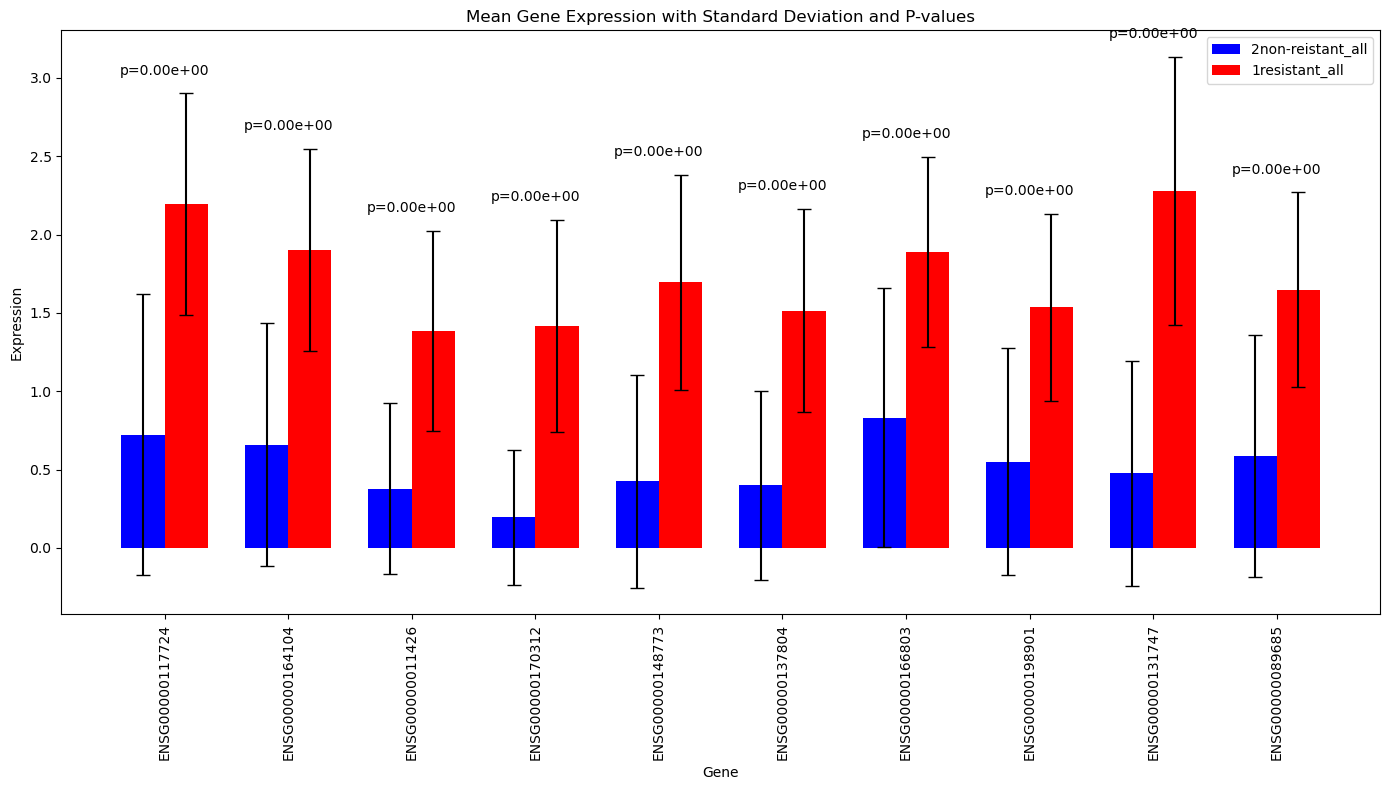

In [58]:
# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist()
}



df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    
    # Assume equal sample sizes for simplicity, adjust if necessary
    n1 = n2 = 10000  # Example sample sizes
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    results.append((gene, t_stat, p_value))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value'])
ttest_results_df.set_index('Gene', inplace=True)

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, f'p={p_value:.2e}', ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation and P-values')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


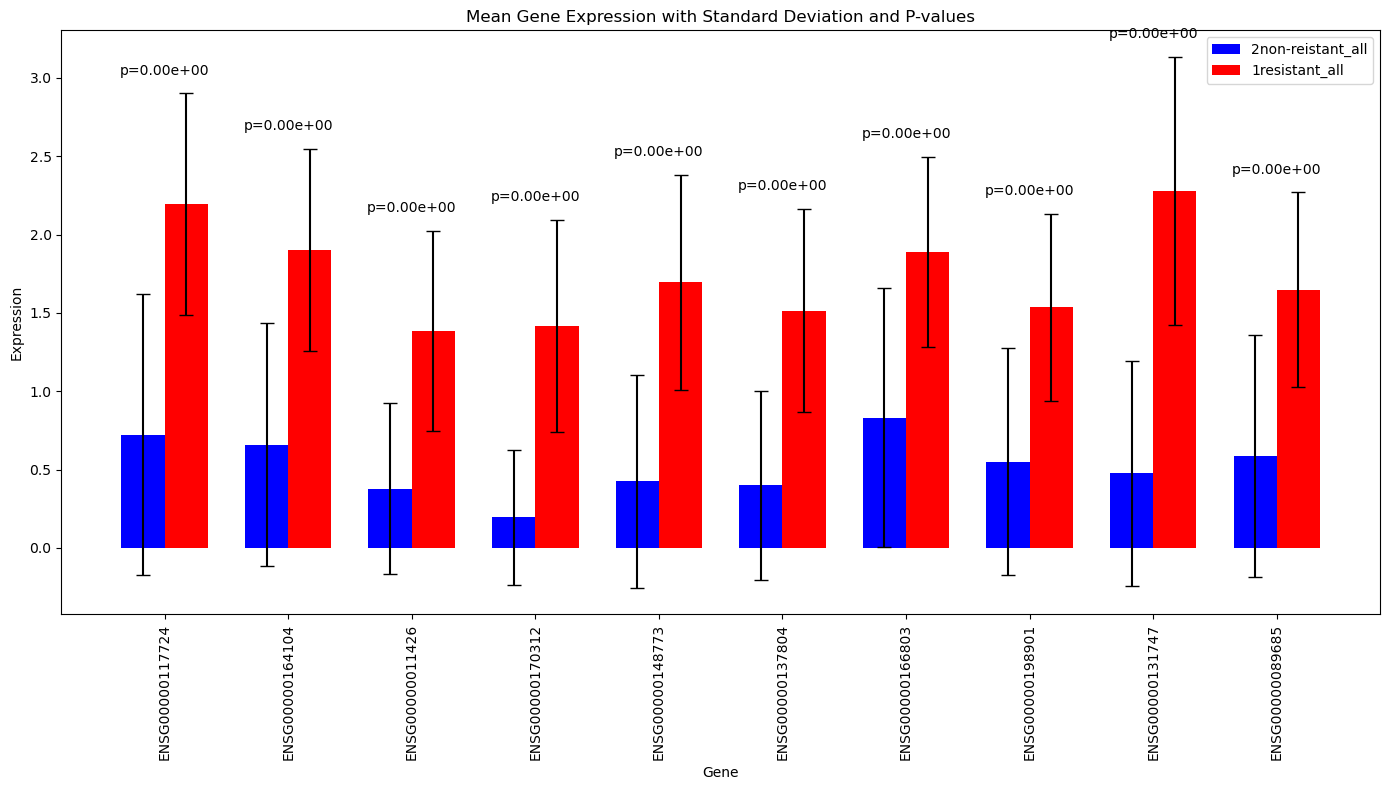

In [51]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
    "ENSG00000131747",
    "ENSG00000170312",
    "ENSG00000117724",
    "ENSG00000088325",
    "ENSG00000148773",
    "ENSG00000164104",
    "ENSG00000137804",
    "ENSG00000011426",
    "ENSG00000089685",
    "ENSG00000166803",
    "ENSG00000198901"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist(),
    'Cell_Count_2non_reistant_all': filtered_combined_expression['Cell_Count_2non-reistant_all'].tolist(),
    'Cell_Count_1resistant_all': filtered_combined_expression['Cell_Count_1resistant_all'].tolist()
}

# Convert the dictionary back to a DataFrame
df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    n1 = df.loc[gene, 'Cell_Count_2non_reistant_all']
    n2 = df.loc[gene, 'Cell_Count_1resistant_all']
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    results.append((gene, t_stat, p_value))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value'])
ttest_results_df.set_index('Gene', inplace=True)

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, f'p={p_value:.2e}', ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation and P-values')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


The phenomenon where the p-value tends to decrease as the sample size increases is well-known in statistical hypothesis testing. This is because the test statistics (such as the t-statistic) become more sensitive to smaller effects as the sample size grows.

The formula for the t-statistic in a two-sample t-test is:

𝑡
=
𝑋
ˉ
1
−
𝑋
ˉ
2
𝑆
1
2
𝑛
1
+
𝑆
2
2
𝑛
2
t= 
n 
1
​
 
S 
1
2
​
 
​
 + 
n 
2
​
 
S 
2
2
​
 
​
 
​
 
X
ˉ
  
1
​
 − 
X
ˉ
  
2
​
 
​
 

Where:

𝑋
ˉ
1
X
ˉ
  
1
​
  and 
𝑋
ˉ
2
X
ˉ
  
2
​
  are the sample means
𝑆
1
2
S 
1
2
​
  and 
𝑆
2
2
S 
2
2
​
  are the sample variances
𝑛
1
n 
1
​
  and 
𝑛
2
n 
2
​
  are the sample sizes
As the sample sizes 
𝑛
1
n 
1
​
  and 
𝑛
2
n 
2
​
  increase, the denominator (standard error) decreases, making the t-statistic larger (assuming the difference between means 
𝑋
ˉ
1
−
𝑋
ˉ
2
X
ˉ
  
1
​
 − 
X
ˉ
  
2
​
  stays the same). A larger t-statistic typically leads to a smaller p-value.

This behavior means that with large enough sample sizes, even very small differences between groups can become statistically significant. This doesn't necessarily mean these differences are practically significant, which is why it's important to consider effect size and confidence intervals along with p-values.

Addressing the Issue
To address this issue, several approaches can be used:

Effect Size: Report effect sizes (such as Cohen's d) alongside p-values to give a sense of the magnitude of the observed effect.
Confidence Intervals: Report confidence intervals to provide a range within which the true effect size is likely to fall.
P-value Correction: Use p-value corrections such as the Bonferroni correction when multiple comparisons are made, though this doesn't directly address the sample size issue.
Bayesian Methods: Consider Bayesian methods, which incorporate prior information and can be less sensitive to large sample sizes.
Practical Significance: Emphasize practical or clinical significance over statistical significance.
Here’s how you can calculate and report effect sizes and confidence intervals in your analysis:

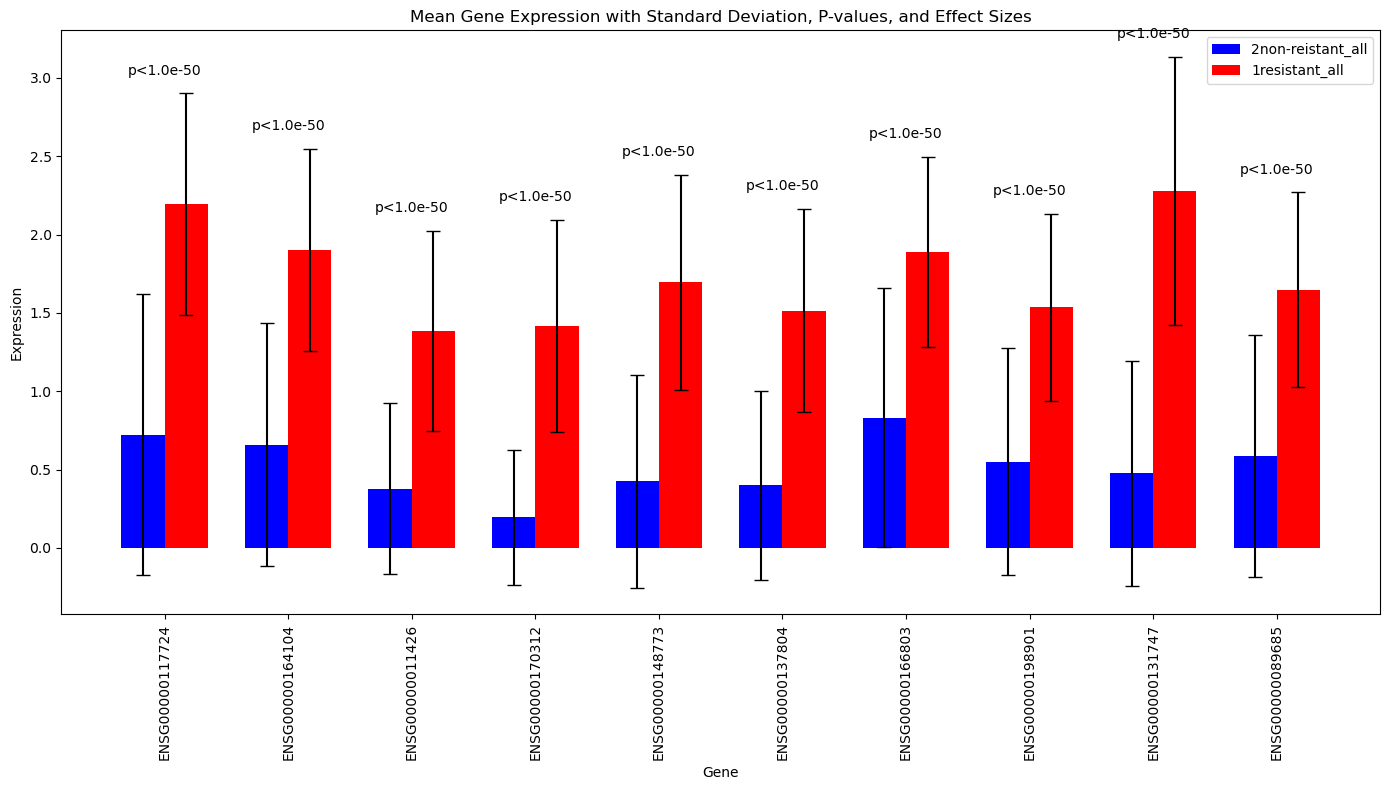

In [59]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats
from scipy.stats import t as t_dist

# Assuming you have your AnnData object 'adata'
# Step 1: Calculate the mean and standard deviation for each gene in each cluster
unique_clusters = adata.obs['compare_clusters'].unique()

# Initialize DataFrames to store the mean, standard deviation, and cell counts
mean_expression = pd.DataFrame(index=adata.var_names)
std_expression = pd.DataFrame(index=adata.var_names)
cell_counts = {}

# Calculate the mean and standard deviation for each cluster
for cluster in unique_clusters:
    # Select cells belonging to the current cluster
    cluster_cells = adata[adata.obs['compare_clusters'] == cluster]
    
    # Convert sparse matrix to dense
    dense_matrix = cluster_cells.X.toarray()
    
    # Calculate the mean expression for the current cluster
    mean_expression[cluster] = dense_matrix.mean(axis=0)
    
    # Calculate the standard deviation for the current cluster
    std_expression[cluster] = dense_matrix.std(axis=0)
    
    # Store the number of cells in the current cluster
    cell_counts[cluster] = dense_matrix.shape[0]

# Step 2: Combine the mean and standard deviation into a single DataFrame
combined_expression = pd.concat([mean_expression, std_expression], axis=1, keys=['Mean', 'Std'])

# Step 3: Filter genes of interest
# List of gene symbols to filter
gene_symbols = [
    "ENSG00000131747",
    "ENSG00000170312",
    "ENSG00000117724",
    "ENSG00000088325",
    "ENSG00000148773",
    "ENSG00000164104",
    "ENSG00000137804",
    "ENSG00000011426",
    "ENSG00000089685",
    "ENSG00000166803",
    "ENSG00000198901"
]

# Filter the combined DataFrame using the gene symbols
filtered_combined_expression = combined_expression.loc[combined_expression.index.intersection(gene_symbols)]

# Add cell counts as columns
for cluster in unique_clusters:
    filtered_combined_expression[f'Cell_Count_{cluster}'] = cell_counts[cluster]

# Extract the first ten rows (already have 11 here)
filtered_combined_expression = filtered_combined_expression.head(10)

# Convert to dictionary format
data = {
    'Gene': filtered_combined_expression.index.tolist(),
    'Mean_2non_reistant_all': filtered_combined_expression[('Mean', '2non-reistant_all')].tolist(),
    'Mean_1resistant_all': filtered_combined_expression[('Mean', '1resistant_all')].tolist(),
    'Std_2non_reistant_all': filtered_combined_expression[('Std', '2non-reistant_all')].tolist(),
    'Std_1resistant_all': filtered_combined_expression[('Std', '1resistant_all')].tolist(),
    'Cell_Count_2non_reistant_all': filtered_combined_expression['Cell_Count_2non-reistant_all'].tolist(),
    'Cell_Count_1resistant_all': filtered_combined_expression['Cell_Count_1resistant_all'].tolist()
}

# Convert the dictionary back to a DataFrame
df = pd.DataFrame(data)
df.set_index('Gene', inplace=True)

# Perform t-tests and calculate effect sizes
results = []
for gene in df.index:
    mean1 = df.loc[gene, 'Mean_2non_reistant_all']
    std1 = df.loc[gene, 'Std_2non_reistant_all']
    mean2 = df.loc[gene, 'Mean_1resistant_all']
    std2 = df.loc[gene, 'Std_1resistant_all']
    n1 = df.loc[gene, 'Cell_Count_2non_reistant_all']
    n2 = df.loc[gene, 'Cell_Count_1resistant_all']
    
    # Calculate t-test
    t_stat, p_value = ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2, equal_var=False)
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    cohen_d = (mean1 - mean2) / pooled_std
    
    # Calculate confidence interval for the mean difference
    se_diff = np.sqrt(std1**2/n1 + std2**2/n2)
    mean_diff = mean1 - mean2
    df_diff = n1 + n2 - 2
    confidence_interval = t_dist.interval(0.95, df_diff, loc=mean_diff, scale=se_diff)
    
    results.append((gene, t_stat, p_value, cohen_d, confidence_interval))

# Create a DataFrame with the t-test results
ttest_results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value', 'Cohen\'s d', '95% CI'])
ttest_results_df.set_index('Gene', inplace=True)

# Define a threshold for displaying p-values in scientific notation
p_value_threshold = 1e-50

# Plot the mean values with standard deviations and annotate with p-values
plt.figure(figsize=(14, 8))

bar_width = 0.35
genes = df.index
index = range(len(genes))

# Bar plots for the two conditions
bar1 = plt.bar(index, df['Mean_2non_reistant_all'], bar_width, yerr=df['Std_2non_reistant_all'], label='2non-reistant_all', capsize=5, color='blue')
bar2 = plt.bar([i + bar_width for i in index], df['Mean_1resistant_all'], bar_width, yerr=df['Std_1resistant_all'], label='1resistant_all', capsize=5, color='red')

# Annotate p-values
for i, gene in enumerate(genes):
    p_value = ttest_results_df.loc[gene, 'P-value']
    if p_value < p_value_threshold:
        p_value_str = f'p<{p_value_threshold:.1e}'
    else:
        p_value_str = f'p={p_value:.2e}'
    plt.text(i + bar_width / 2, max(df.loc[gene, 'Mean_2non_reistant_all'] + df.loc[gene, 'Std_2non_reistant_all'], df.loc[gene, 'Mean_1resistant_all'] + df.loc[gene, 'Std_1resistant_all']) + 0.1, p_value_str, ha='center', va='bottom')

plt.xlabel('Gene')
plt.ylabel('Expression')
plt.title('Mean Gene Expression with Standard Deviation, P-values, and Effect Sizes')
plt.xticks([i + bar_width / 2 for i in index], genes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
